Topic modelling helps us uncover the main themes that run through a collection of documents. It is a technique used in natural language processing to identify the underlying topics in a large set of documents. By analyzing the frequency of words and their co-occurrence patterns, LDA can group similar documents together and extract the dominant topics.

1. Prepare the text data for LDA
2. Build the structures that lda requires
3. Train the model

In [38]:
import pandas as pd
import re

from nltk import corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim
import gensim.corpora as corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv(r"C:\Users\kdhakal\Documents\NLP\Dataset\news_articles.csv")

In [40]:
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


In [41]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       100 non-null    int64
 1   title    100 non-null    str  
 2   content  100 non-null    str  
dtypes: int64(1), str(2)
memory usage: 2.5 KB


In [42]:
articles = data['content']

In [43]:
# take just the content of the article, lowercase and remove punctuation
articles = data['content'].str.lower().apply(lambda x: re.sub(r"([^\w\s])", "", x))

# stop word removal
en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

# tokenize
articles = articles.apply(lambda x: word_tokenize(x))

# stemming (done for speed as we have a lot of text)
ps = PorterStemmer()
articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])

In [44]:
articles

0     [dr, frank, sack, professor, nutrit, harvard, ...
1     [south, carolina, win, duke, surpris, fan, pos...
2     [want, get, brief, email, here, good, even, he...
3     [banjul, gambia, week, inaugur, anoth, countri...
4     [biggest, book, summer, isnt, blockbust, thril...
                            ...                        
95    [want, get, brief, email, here, good, even, he...
96    [tallinn, estonia, guard, brought, ahm, abdul,...
97    [gov, scott, walker, wisconsin, activ, wiscons...
98    [social, media, shook, emot, headlin, shout, n...
99    [moment, joanna, acevedo, first, set, foot, bo...
Name: content, Length: 100, dtype: object

In [45]:
dictionary = corpora.Dictionary(articles)

In [46]:
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


doc2bow() takes a single article, looks up each word in the dictionary and returns a list of tuples. Each tuple contains the word index and the frequency of the word in the article.

In [47]:
doc_term = [dictionary.doc2bow(text) for text in articles]

In [48]:
print(doc_term[:10])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 3), (21, 3), (22, 1), (23, 3), (24, 2), (25, 4), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 1), (50, 2), (51, 2), (52, 1), (53, 1), (54, 2), (55, 1), (56, 2), (57, 6), (58, 1), (59, 1), (60, 1), (61, 4), (62, 2), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 5), (71, 4), (72, 1), (73, 1), (74, 1), (75, 2), (76, 2), (77, 1), (78, 2), (79, 2), (80, 1), (81, 1), (82, 1), (83, 4), (84, 2), (85, 1), (86, 1), (87, 3), (88, 1), (89, 3), (90, 1), (91, 2), (92, 3), (93, 6), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 2), (104, 5), (105, 1), (106, 2), (107, 1), (108, 1), (109, 3), (110, 4)

In [49]:
num_topics = 2

In [50]:
lda_model = gensim.models.LdaModel(corpus=doc_term, num_topics=num_topics, id2word=dictionary, passes=10)

In [51]:
lda_model.print_topics(num_topics=num_topics, num_words=10)

[(0,
  '0.013*"said" + 0.012*"mr" + 0.005*"one" + 0.004*"would" + 0.004*"new" + 0.004*"like" + 0.004*"year" + 0.003*"time" + 0.003*"two" + 0.003*"state"'),
 (1,
  '0.020*"mr" + 0.016*"said" + 0.009*"trump" + 0.005*"state" + 0.005*"would" + 0.004*"year" + 0.004*"one" + 0.004*"peopl" + 0.003*"presid" + 0.003*"like"')]

Lsi model

In [52]:
lsa_model = LsiModel(doc_term, num_topics=num_topics, id2word=dictionary)
print(lsa_model.print_topics(num_topics=num_topics, num_words=10))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would" + 0.108*"year" + 0.102*"one" + 0.091*"like" + 0.090*"peopl" + 0.086*"new"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight" + 0.140*"taliban" + 0.120*"one" + 0.120*"dr" + 0.120*"peopl" + 0.107*"year"')]


A coherent score tell us how meaningful the top words in a topic are when grouped together.

In [53]:
coherence_values = []
model_list = []

min_topics = 2
max_topics = 10

for num_topics_i in range(min_topics, max_topics + 1):
    model = LsiModel(doc_term, num_topics=num_topics_i, id2word=dictionary, random_seed=0)
    model_list.append(model)
    coherence_model_lsi = CoherenceModel(model=model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model_lsi.get_coherence())

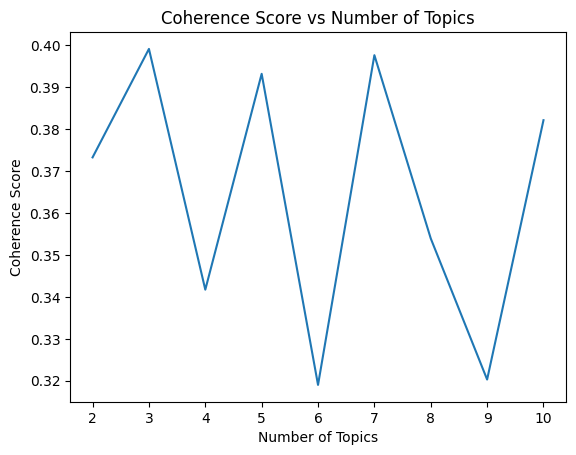

In [54]:
plt.plot(range(min_topics, max_topics + 1), coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.show()

In [55]:
final_n_topics = 3
lsamodel_f = LsiModel(doc_term, num_topics=final_n_topics, id2word=dictionary, random_seed=0)
print(lsamodel_f.print_topics(num_topics=final_n_topics, num_words=10))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would" + 0.108*"year" + 0.102*"one" + 0.091*"like" + 0.090*"peopl" + 0.086*"new"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight" + 0.140*"taliban" + 0.120*"one" + 0.120*"dr" + 0.120*"peopl" + 0.107*"year"'), (2, '0.460*"saudi" + 0.264*"taliban" + -0.249*"weight" + 0.194*"afghanistan" + -0.191*"dr" + 0.189*"arabia" + 0.174*"afghan" + 0.139*"offici" + -0.139*"diet" + 0.127*"state"')]
